# 특성 공학 feature engineering
- 3차원 의상의 공간을 그리거나 상상할 수는 없으나, 선형회귀를 사용하여 특성이 많은 고차원에서 매우 복잡한 모델을 표현할 수 있다
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성공학이라고 부른다

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# train, test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    perch_full, perch_weight, random_state = 1226
)

In [5]:
# 사이킷런에는 특성 전처리 및 변환을 위한 클래스를 제공하는 변환기가 존재
from sklearn.preprocessing import PolynomialFeatures 

In [6]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [8]:
# fit() 메서드는 새롭게 만들 특성 조합을 찾고, transform() 메서드는 실제로 데이터를 변환하는 역할
# fit() 메서드 호출에서, 변환기는 입력 데이터를 변환하는데 타깃 데이터를 필요로 하지 않음

poly = PolynomialFeatures(include_bias = False) # 이 부분에서 절편을 위한 항은 제거
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 결과물은 feature 제곱, features 간 곱한 값들만 추가
# 사실 include_bias = False  가 일반값이기 떄문에, 저 클래스는 자동적으로 무시

[[2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
print(train_poly.shape)

(42, 9)


In [12]:
# polynomialfeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 좋은 방법제공
# get_feature_names() 메서드 호출 시 9개 특성이 어떤 조합으로 만들어졌는지도 알려줌
poly.get_feature_names()
# x0 은 첫번째 특성, x0^2 는 x0 의 제곱값, x0 x1 는 x0, x1 의 곱한 값을 의미함

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [14]:
test_poly = poly.transform(X_test)
# 꼭 train셋에 적용하였던 변환기로 테스트셋 변환이 필요할까? 
# 물론 polynomial features 클래스는 별도 통계값을 구하지 않기 때문에, 테스트셋에 별도 적용해도 되나
# 일반적으로 훈련셋 기준으로 테스트셋을 변환하는 습관을 들이는 것이 중요

In [16]:
# 다중 회귀 모델 훈련하기 : 여러개의 특성을 사용한 선형회귀를 수행
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# 다항변수 처리하지 않았을 경우의 학습 결정계수 (r-squared)
# lr.score() 함수 자체에 이미 predict() , predict() 를 사용해 얻은 예측값 뽑아내는 함수 둘다 가지고 있는 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9436450725338807
0.931687817823099


In [20]:
# 다항변수 처리하였을 경우의 학습 결정계수 (r-squared)
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9941473874412844
0.9598100582407771


In [21]:
# 다항변수 처리 후 score 를 살펴보니 모두 점수가 올랐다

In [24]:
# 어느 수준까지 다항변수 처리하면 유의미한 모델 개선 효과가 드러날까?
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(X_train) 
train_poly = poly.transform(X_train) 
test_poly = poly.transform(X_test) 
print(train_poly.shape)

(42, 55)


In [25]:
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))

0.999999999999998


In [27]:
print(lr.score(test_poly, y_test)) 
# 엄청난 음수를 보임
# 특성의 갯수를 크게 늘리면 선형 모델은 아주 강력해짐
# 훈련 셋에 대해 거의 완벽하게 학습할 수 있으나, 과대적합되어 테스트셋에는 형편없는 점수 생성

-35.68228867738106


In [28]:
# 심지어 만약, 샘플 갯수보다 피쳐가 많다면 어떨까? 
# 현재 학습한 샘플은 42개, 특성은 55개
# 완벽하게 학습되는 것이 당연하나, 과적합 우려를 피할 수 없다

In [30]:
# 규제
# 너무 과도하게 훈련셋에 학습하지 않도록 하는 것
# 선형회귀 모델의 경우, 특성에 곱해지는 계수를 작게 만드는 일

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 
ss.fit(train_poly) 
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# StandardScaler 클래스의 객체 ss 를 초기화
# PolynomialFeatures 클래스로 만든 train_poly 를 사용하여 이 객체를 훈련
# 최종 표준점수로 변환한 train_scaled 과 test_scaled 가 준비

In [31]:
#규체 추가하는 방식 : ridge, lasso 
# ridge : 계수를 제곱한 값을 기준으로 규제를 적용
# lasso : 계수의 절댓값을 기준으로 규제를 적용
# ridge 를 일반적으로 더 선호, lasso 의 경우 계수의 크기를 0으로 조절하여 영향을 끼치ㅣㅈ 않게 만들 수도 있음

In [32]:
# 릿지회귀
from sklearn.linear_model import Ridge 
ridge = Ridge() 
ridge.fit(train_scaled, y_train) 
print(ridge.score(train_scaled, y_train))
# 선형회귀에서 0.999999... 였던 점수가 조금 낮아짐

0.9926216119555998


In [33]:
print(ridge.score(test_scaled, y_test))
# 테스트셋 점수의 경우, 음의 점수값을 가지는게 아니고 정상적인 범주로 돌아옴

0.9699429601434595


In [34]:
# ridge lasso 모델 사용시 규제의 양도 조절이 가능
# alpha 를 사용하면 되며, 
# alpha 값이 커지면 규제 강도가 세지므로 계수값을 더 줄임, 조금 더 과소적합
# alpha 값이 작아지면 규제강도가 작아지므로 계수값을 덜 줄임, 과대적합될 가능성이 큼
# alpha 값의 형우 사람이 적당한 방법을 찾아야 함
## 방법? alpha 에 대한 r-squared 값을 그려서 훈련-테스트셋 점수가 가장 가까운 지점을 선택


In [51]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

# alpha 값을 0.001 ~ 100 까지 10 배씩 늘려가며 릿지회귀모델을 훈련한 다음 확인
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list: 
  # 릿지 모델을 만든다 
  ridge = Ridge(alpha = alpha)
  # 릿지 모델 훈련시킨다 
  ridge.fit(train_scaled, y_train)
  # 훈련 점수와 테스트 점수를 저장 
  train_score.append(ridge.score(train_scaled, y_train))
  test_score.append(ridge.score(test_scaled, y_test))

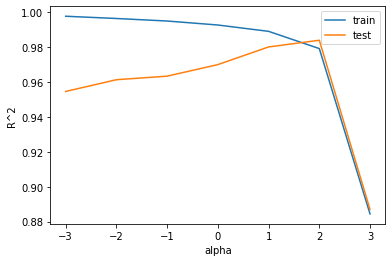

In [55]:
# 그래프를 이쁘게 그리기 위해, alpha_list 의 값을 지수값으로 변환하여 동일한 간격으로 표현

plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test') 
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
# 10**2 되는 되는 지점에서 r-squared 점수 역전
# train set 은 점차 감소하고, test set 은 증가하다가 감소하는 형태
# 적절한 alpha 값은 두 그래프가 가장 가깝고, 테스트셋이 점수가 높은 2 의 상태
# (책의 결과와 다르게 나옴)

In [56]:
ridge = Ridge(alpha = 2)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9917285047519867
0.9723847081660919


In [58]:
# 라쏘 회귀
from sklearn.linear_model import Lasso 
lasso = Lasso() 
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.9914936860826707


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e+03, tolerance: 5.193e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [59]:
print(lasso.score(test_scaled, y_test))

0.9714585457613373


In [61]:
train_score = []
test_score = []
alpha_list = [0.001, 0.1, 0.1, 1, 10, 100]
for alpha in alpha_list: 
  lasso = Lasso(alpha = alpha, max_iter = 10000) 
  lasso.fit(train_scaled, y_train) 
  # 훈련점수와 테스트점수 저장 
  train_score.append(lasso.score(train_scaled, y_train)) 
  test_score.append(lasso.score(test_scaled, y_test))

# 아래와 같이 ConvergenceWarning 가 뜰 경우
# 최적의 계수를 찾기 위한 반복적인 계산을 수행하는데 지정 반복횟수가 부족할 때 발생하는 함수
# 이를 확인한 뒤 max_iter 변수 값을 늘리면 된다

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.721e+03, tolerance: 5.193e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.162e+02, tolerance: 5.193e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

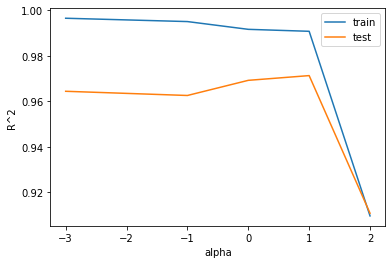

In [63]:
# 그래프를 이쁘게 그리기 위해, alpha_list 의 값을 지수값으로 변환하여 동일한 간격으로 표현

plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test') 
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
# 왼쪽은 과대적합 : 학습 오차는 적고 테스트 오차는 큰 경우
# 오른쪽으로 갈수록 훈련셋과 테스트셋 점수 폭이 줄어든다
# 가장 오른쪽은 아주 크게 점수가 감소하고 있는데, 이는 과소적합된 모델을 의미
# 이때의 최적의 alpha 값은 1, 

In [65]:
# 위의 그래프를 기반으로 다시 훈련
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, y_train) 
print(lasso.score(train_scaled, y_train)) 
print(lasso.score(test_scaled, y_test))

0.9905872112608383
0.9732179347342856


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+03, tolerance: 5.193e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# 학습된 계수 중에서, 라쏘 모델을 통해 0이 된 것들을 확인하는 방법
print(np.sum(lasso.coef_ == 0)) # 갯수 확인
# np.sum() 함수는 배열을 모두 더한 것을 의미, == 0 으로 확인했기 때문에 
# 맞는 것은 True 로 반환될 것

In [ ]:
# PolynomialFeatures
#  : degree = 2 가 기본,
# interaction_only = True 이면 거듭제곱항은 제외하고 특성간의 곱셈항만 추가,
# include_bias = False 이면 절편 미포함, 기본은 True

# Ridge 
# : alpha 로 규제 강도 정하며, 클 수록 일반화 됨, 
# solver 매개변수에 '최적의 모델 찾기 위한 방법 지정' 기본 auto

In [ ]:
# 확인문제
#1. degree = 3 으로 지정된 PolynomialFeatures 일경우 : 4 은 포함되지 않는다, 차수가 4이기 때문에 범위에서 벗어남
#2. 특성 표준화 사이킷런 변환기 클래스 : StandardScaler
#3. 과대적합 모델은 훈련셋 점수가 높다
#3. 과대적합인 모델은 테스트셋의 점수는 낮다 -- 답
#3. 과소적합인 모델은 훈련셋의 점수가 낮다
#3. 과소적합인 모델은 테스트셋의 점수가 낮다